In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("all_questions.csv")

In [40]:

import pymysql

def connectDB():
    db = pymysql.connect(host="localhost", user="root", password="", database="deeplearning")
    print("connected...")
    return db
def queryDb(db, sql):
    cursor = db.cursor()
    cursor.execute(sql)
    results = cursor.fetchone()
    return results

In [4]:
df['pipe_cate'].value_counts()

3    34727
4    25773
1     4621
0     3424
2     1394
5      968
Name: pipe_cate, dtype: int64

In [33]:
stage0 = df[df['pipe_cate']==0]
stage1 = df[df['pipe_cate']==1]
stage2 = df[df['pipe_cate']==2]
stage3 = df[df['pipe_cate']==3]
stage4 = df[df['pipe_cate']==4]
stage5 = df[df['pipe_cate']==5]

In [34]:
stage0_popularity = stage0[['post_id','creation_date','view_count','answer_count','comment_count','favorite_count','score']]
stage0col_mean = stage0_popularity[['view_count','answer_count','comment_count','favorite_count','score']].mean()

stage1_popularity = stage1[['post_id','creation_date','view_count','answer_count','comment_count','favorite_count','score']]
stage1col_mean = stage1_popularity[['view_count','answer_count','comment_count','favorite_count','score']].mean()

stage2_popularity = stage2[['post_id','creation_date','view_count','answer_count','comment_count','favorite_count','score']]
stage2col_mean = stage2_popularity[['view_count','answer_count','comment_count','favorite_count','score']].mean()

stage3_popularity = stage3[['post_id','creation_date','view_count','answer_count','comment_count','favorite_count','score']]
stage3col_mean = stage3_popularity[['view_count','answer_count','comment_count','favorite_count','score']].mean()

stage4_popularity = stage4[['post_id','creation_date','view_count','answer_count','comment_count','favorite_count','score']]
stage4col_mean = stage4_popularity[['view_count','answer_count','comment_count','favorite_count','score']].mean()

stage5_popularity = stage5[['post_id','creation_date','view_count','answer_count','comment_count','favorite_count','score']]
stage5col_mean = stage5_popularity[['view_count','answer_count','comment_count','favorite_count','score']].mean()

In [35]:
popularity = pd.concat([stage0col_mean, stage1col_mean, stage2col_mean, stage3col_mean, stage4col_mean, stage5col_mean], axis=1)

# popularity.to_csv("popularity.csv")

In [29]:
from sklearn.preprocessing import MinMaxScaler
import mcdm
scaler = MinMaxScaler()
scaler.fit(popularity.T)
scaled_features = scaler.transform(popularity.T)
alt_names = ["BK", "EP", "DP", "MS", "MT", "ME"]
df_MinMax = pd.DataFrame(data=scaled_features, columns=["view_count", "answer_count", "comment_count","favorite_count", "score"])
popularityrank = mcdm.rank(df_MinMax.values, alt_names=alt_names,n_method="Linear2", w_method="CRITIC", s_method="TOPSIS")


In [36]:
difficulty1 = popularity.iloc[0]/popularity.iloc[1]
difficulty1

0    1197.574175
1    2553.843951
2    1744.373510
3    1378.229293
4    1406.776469
5    3306.050909
dtype: float64

In [37]:
import numpy as np
cnt0 = 0
for index, row in stage0.iterrows():
    if np.isnan(row['accepted_answer_id']):
        cnt0 += 1
cnt1 = 0
for index, row in stage1.iterrows():
    if np.isnan(row['accepted_answer_id']):
        cnt1 += 1
cnt2 = 0
for index, row in stage2.iterrows():
    if np.isnan(row['accepted_answer_id']):
        cnt2 += 1
cnt3 = 0
for index, row in stage3.iterrows():
    if np.isnan(row['accepted_answer_id']):
        cnt3 += 1
cnt4 = 0
for index, row in stage4.iterrows():
    if np.isnan(row['accepted_answer_id']):
        cnt4 += 1
cnt5 = 0
for index, row in stage5.iterrows():
    if np.isnan(row['accepted_answer_id']):
        cnt5 += 1

In [38]:
unanswered = np.array([cnt0, cnt1, cnt2, cnt3, cnt4, cnt5], dtype=float)
sum = np.array([len(stage0), len(stage1), len(stage2), len(stage3), len(stage4), len(stage5)], dtype=float)
w_o = unanswered/sum
print(w_o)

[0.61653037 0.69184159 0.60401722 0.59495493 0.64404609 0.61157025]


In [39]:
data = [difficulty1.values, w_o]
difficulty = pd.DataFrame(data=data, index=['pd', 'w/o'], columns=["0", "1", "2", "3", "4", "5"])
difficulty[["0", "1", "2", "3", "4", "5"]]


,0,1,2,3,4,5
pd,1197.574175,2553.843951,1744.373510,1378.229293,1406.776469,3306.050909
w/o,0.616530,0.691842,0.604017,0.594955,0.644046,0.611570


In [41]:
import time

db = connectDB()

cnt0 = 0
span0 = 0
for index, row in stage0.iterrows():
    if not np.isnan(row['accepted_answer_id']):
        # print(row['CreationDate'])
        start = time.mktime(time.strptime(row['creation_date'], '%Y-%m-%d %H:%M:%S'))
        Aid = str(row['accepted_answer_id'])
        sql = "select creation_date from answers_used where post_id = " + Aid
        result = queryDb(db, sql)
        if(result is None):
            continue
        # print(answer.iloc[0]['CreationDate'])
        end = time.mktime(time.strptime(str(result[0]), '%Y-%m-%d %H:%M:%S'))
        # days
        span = round(end - start) / (3600*24)
        span0 += span
        cnt0 += 1
hours0 = span0/cnt0

cnt1 = 0
span1 = 0
for index, row in stage1.iterrows():
    if not np.isnan(row['accepted_answer_id']):
        # print(row['CreationDate'])
        start = time.mktime(time.strptime(row['creation_date'], '%Y-%m-%d %H:%M:%S'))
        Aid = str(row['accepted_answer_id'])
        sql = "select creation_date from answers_used where post_id = " + Aid
        result = queryDb(db, sql)
        if(result is None):
            continue
        # print(answer.iloc[0]['CreationDate'])
        end = time.mktime(time.strptime(str(result[0]), '%Y-%m-%d %H:%M:%S'))
        # days
        span = round(end - start) / (3600*24)
        span1 += span
        cnt1 += 1
hours1 = span1/cnt1

cnt2 = 0
span2 = 0
for index, row in stage2.iterrows():
    if not np.isnan(row['accepted_answer_id']):
        # print(row['CreationDate'])
        start = time.mktime(time.strptime(row['creation_date'], '%Y-%m-%d %H:%M:%S'))
        Aid = str(row['accepted_answer_id'])
        sql = "select creation_date from answers_used where post_id = " + Aid
        result = queryDb(db, sql)
        if(result is None):
            continue
        # print(answer.iloc[0]['CreationDate'])
        end = time.mktime(time.strptime(str(result[0]), '%Y-%m-%d %H:%M:%S'))
        # days
        span = round(end - start) / (3600*24)
        span2 += span
        cnt2 += 1
hours2 = span2/cnt2

cnt3 = 0
span3 = 0
for index, row in stage3.iterrows():
    if not np.isnan(row['accepted_answer_id']):
        # print(row['CreationDate'])
        start = time.mktime(time.strptime(row['creation_date'], '%Y-%m-%d %H:%M:%S'))
        Aid = str(row['accepted_answer_id'])
        sql = "select creation_date from answers_used where post_id = " + Aid
        result = queryDb(db, sql)
        if(result is None):
            continue
        # print(answer.iloc[0]['CreationDate'])
        end = time.mktime(time.strptime(str(result[0]), '%Y-%m-%d %H:%M:%S'))
        # days
        span = round(end - start) / (3600*24)
        span3 += span
        cnt3 += 1
hours3 = span3/cnt3

cnt4 = 0
span4 = 0
for index, row in stage4.iterrows():
    if not np.isnan(row['accepted_answer_id']):
        # print(row['CreationDate'])
        start = time.mktime(time.strptime(row['creation_date'], '%Y-%m-%d %H:%M:%S'))
        Aid = str(row['accepted_answer_id'])
        sql = "select creation_date from answers_used where post_id = " + Aid
        result = queryDb(db, sql)
        if(result is None):
            continue
        # print(answer.iloc[0]['CreationDate'])
        end = time.mktime(time.strptime(str(result[0]), '%Y-%m-%d %H:%M:%S'))
        # days
        span = round(end - start) / (3600*24)
        span4 += span
        cnt4 += 1
hours4 = span4/cnt4

cnt5 = 0
span5 = 0
for index, row in stage5.iterrows():
    if not np.isnan(row['accepted_answer_id']):
        # print(row['CreationDate'])
        start = time.mktime(time.strptime(row['creation_date'], '%Y-%m-%d %H:%M:%S'))
        Aid = str(row['accepted_answer_id'])
        sql = "select creation_date from answers_used where post_id = " + Aid
        result = queryDb(db, sql)
        if(result is None):
            continue
        # print(answer.iloc[0]['CreationDate'])
        end = time.mktime(time.strptime(str(result[0]), '%Y-%m-%d %H:%M:%S'))
        # days
        span = round(end - start) / (3600*24)
        span5 += span
        cnt5 += 1
hours5 = span5/cnt5

db.close()

连接上了...


In [42]:
hours = np.array([hours0, hours1, hours2, hours3, hours4, hours5], dtype=float)
data = [difficulty1.values, w_o, hours]
difficulty = pd.DataFrame(data=data, index=['pd', 'w/o', 'days'], columns=["0", "1", "2", "3", "4", "5"])
difficulty[["0", "1", "2", "3", "4", "5"]]
# difficulty.to_csv("difficulty.csv")

,0,1,2,3,4,5
pd,1197.574175,2553.843951,1744.373510,1378.229293,1406.776469,3306.050909
w/o,0.616530,0.691842,0.604017,0.594955,0.644046,0.611570
days,19.583092,18.688136,10.252318,11.385073,9.796333,15.212669


In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mcdm
scaler = MinMaxScaler()
scaler.fit(difficulty.T)
scaled_features = scaler.transform(difficulty.T)
alt_names = ["BK", "EP", "DP", "MS", "MT", "ME"]
df_MinMax = pd.DataFrame(data=scaled_features, columns=['pd', 'w/o', 'days'])
difficultyrank = mcdm.rank(df_MinMax.values, alt_names=alt_names,n_method="Linear2", w_method="CRITIC", s_method="TOPSIS")
difficultyrank

[('EP', 0.7915945693864347),
 ('ME', 0.5814824499148274),
 ('BK', 0.4609814037071731),
 ('MT', 0.23691320838619415),
 ('DP', 0.16113636536345546),
 ('MS', 0.10930153885247304)]

In [6]:
stage0month = stage0[['post_id','creation_date']]
stage0month['creation_date'] = pd.to_datetime(stage0month['creation_date'])
stage0month = stage0month.set_index('creation_date')
stage0month = stage0month.resample('M').count().to_period('M')
stage0month.rename(columns={'post_id':'0'},inplace = True)
stage0month['sum'] = stage0month['0'].cumsum()

stage1month = stage1[['post_id','creation_date']]
stage1month['creation_date'] = pd.to_datetime(stage1month['creation_date'])
stage1month = stage1month.set_index('creation_date')
stage1month = stage1month.resample('M').count().to_period('M')
stage1month.rename(columns={'post_id':'1'},inplace = True)
stage1month['sum'] = stage1month['1'].cumsum()

stage2month = stage2[['post_id','creation_date']]
stage2month['creation_date'] = pd.to_datetime(stage2month['creation_date'])
stage2month = stage2month.set_index('creation_date')
stage2month = stage2month.resample('M').count().to_period('M')
stage2month.rename(columns={'post_id':'2'},inplace = True)
stage2month['sum'] = stage2month['2'].cumsum()

stage3month = stage3[['post_id','creation_date']]
stage3month['creation_date'] = pd.to_datetime(stage3month['creation_date'])
stage3month = stage3month.set_index('creation_date')
stage3month = stage3month.resample('M').count().to_period('M')
stage3month.rename(columns={'post_id':'3'},inplace = True)
stage3month['sum'] = stage3month['3'].cumsum()

stage4month = stage4[['post_id','creation_date']]
stage4month['creation_date'] = pd.to_datetime(stage4month['creation_date'])
stage4month = stage4month.set_index('creation_date')
stage4month = stage4month.resample('M').count().to_period('M')
stage4month.rename(columns={'post_id':'4'},inplace = True)
stage4month['sum'] = stage4month['4'].cumsum()

stage5month = stage5[['post_id','creation_date']]
stage5month['creation_date'] = pd.to_datetime(stage5month['creation_date'])
stage5month = stage5month.set_index('creation_date')
stage5month = stage5month.resample('M').count().to_period('M')
stage5month.rename(columns={'post_id':'5'},inplace = True)
stage5month['sum'] = stage5month['5'].cumsum()

D:\anaconda3\envs\Torch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\Torch\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\anaconda3\envs\Torch\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [7]:
stagemonth = pd.concat([stage0month['0'], stage1month['1'], stage2month['2'], stage3month['3'], stage4month['4'], stage5month['5']], axis=1)
stagemonth.fillna(0, inplace=True)
stagemonth

,0,1,2,3,4,5
creation_date,,,,,,
2009-02,0.0,0.0,0.0,1,0.0,0.0
2009-03,0.0,0.0,0.0,0,0.0,0.0
2009-04,1.0,0.0,0.0,0,0.0,0.0
2009-05,0.0,0.0,0.0,0,0.0,0.0
2009-06,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...
2021-02,69.0,75.0,43.0,715,614.0,20.0
2021-03,54.0,107.0,35.0,846,707.0,18.0
2021-04,47.0,95.0,39.0,840,696.0,21.0


In [8]:
stagemonthratio = stagemonth.div(stagemonth.sum(axis=1), axis=0)
stagemonthratio

,0,1,2,3,4,5
creation_date,,,,,,
2009-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2009-03,NaN,NaN,NaN,NaN,NaN,NaN
2009-04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-05,NaN,NaN,NaN,NaN,NaN,NaN
2009-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-02,0.044922,0.048828,0.027995,0.465495,0.399740,0.013021
2021-03,0.030560,0.060555,0.019808,0.478778,0.400113,0.010187
2021-04,0.027043,0.054661,0.022440,0.483314,0.400460,0.012083


In [9]:
import numpy as np
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re

stagemonthratio = stagemonth.div(stagemonth.sum(axis=1), axis=0)
stagemonthratio.to_csv("unprocess.csv",sep=',',index=True,header=True)
stagemonthratio
stagemonthprocessed = stagemonthratio
stagemonthratio.insert(loc=len(stagemonthratio.columns), column='00', value=moving_average(stagemonthratio['0'],10))
stagemonthratio.insert(loc=len(stagemonthratio.columns), column='01', value=moving_average(stagemonthratio['1'],10))
stagemonthratio.insert(loc=len(stagemonthratio.columns), column='02', value=moving_average(stagemonthratio['2'],10))
stagemonthratio.insert(loc=len(stagemonthratio.columns), column='03', value=moving_average(stagemonthratio['3'],10))
stagemonthratio.insert(loc=len(stagemonthratio.columns), column='04', value=moving_average(stagemonthratio['4'],10))
stagemonthratio.insert(loc=len(stagemonthratio.columns), column='05', value=moving_average(stagemonthratio['5'],10))

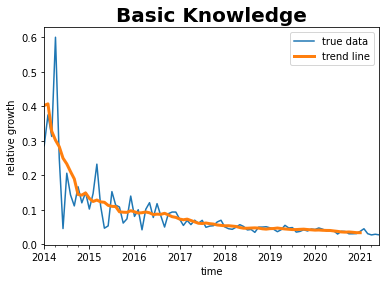

In [20]:
import matplotlib.pyplot as plt
stagemonthratio[(stagemonthratio.index>='2014-01')]['0'].plot(title="Basic Knowledge",label='true data')
stagemonthratio[(stagemonthratio.index>='2014-01') & (stagemonthratio.index<='2021-01')]['00'].plot(title="Basic Knowledge",label='trend line',linewidth=3)
plt.title("Basic Knowledge", fontsize=20,fontweight='bold')
plt.ylabel("relative growth")
plt.xlabel("time")
plt.legend()
plt.savefig("evolution_BK.pdf")

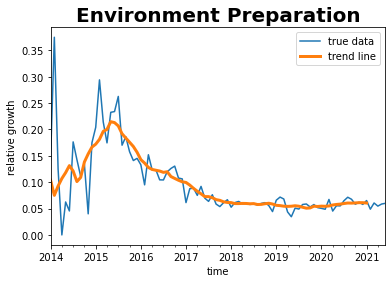

In [22]:
stagemonthratio[(stagemonthratio.index>='2014-01')]['1'].plot( title="EP", label='true data')
stagemonthratio[(stagemonthratio.index>='2014-01')& (stagemonthratio.index<='2021-01')]['01'].plot(title="EP",linewidth=3, label='trend line')
plt.title("Environment Preparation", fontsize=20,fontweight='bold')
plt.ylabel("relative growth")
plt.xlabel("time")
plt.legend()
plt.savefig("evolution_EP.pdf")

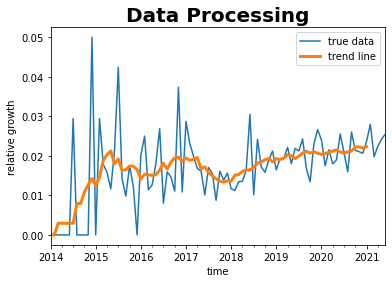

In [23]:
stagemonthratio[(stagemonthratio.index>='2014-01')]['2'].plot(title="DP", label='true data')
stagemonthratio[(stagemonthratio.index>='2014-01')& (stagemonthratio.index<='2021-01')]['02'].plot(title="DP",linewidth=3, label='trend line')
plt.title("Data Processing", fontsize=20,fontweight='bold')
plt.ylabel("relative growth")
plt.xlabel("time")
plt.legend()
plt.savefig("evolution_DP.pdf")

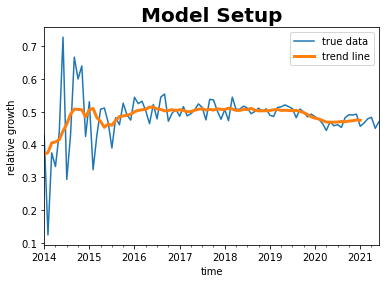

In [24]:
stagemonthratio[(stagemonthratio.index>='2014-01')]['3'].plot( title="MS", label='true data')
stagemonthratio[(stagemonthratio.index>='2014-01')& (stagemonthratio.index<='2021-01')]['03'].plot( title="MS",linewidth=3, label='trend line')
plt.title("Model Setup", fontsize=20,fontweight='bold')
plt.ylabel("relative growth")
plt.xlabel("time")
plt.legend()
plt.savefig("evolution_MS.pdf")

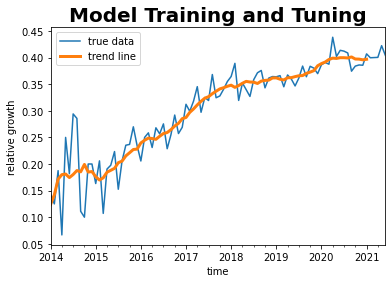

In [25]:
stagemonthratio[(stagemonthratio.index>='2014-01')]['4'].plot(title="MT", label='true data')
stagemonthratio[(stagemonthratio.index>='2014-01')& (stagemonthratio.index<='2021-01')]['04'].plot(title="MT",linewidth=3, label='trend line')
plt.title("Model Training and Tuning", fontsize=20,fontweight='bold')
plt.ylabel("relative growth")
plt.xlabel("time")
plt.legend()
plt.savefig("evolution_MT.pdf")

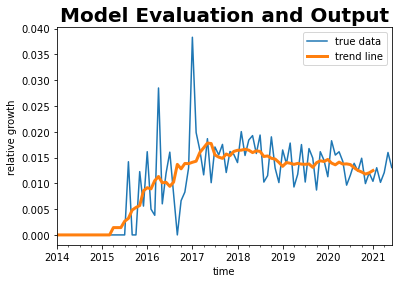

In [26]:
stagemonthratio[(stagemonthratio.index>='2014-01')]['5'].plot(title="ME", label='true data')
stagemonthratio[(stagemonthratio.index>='2014-01')& (stagemonthratio.index<='2021-01')]['05'].plot(title="ME",linewidth=3, label='trend line')
plt.title("Model Evaluation and Output", fontsize=20,fontweight='bold')
plt.ylabel("relative growth")
plt.xlabel("time")
plt.legend()
plt.savefig("evolution_ME.pdf")

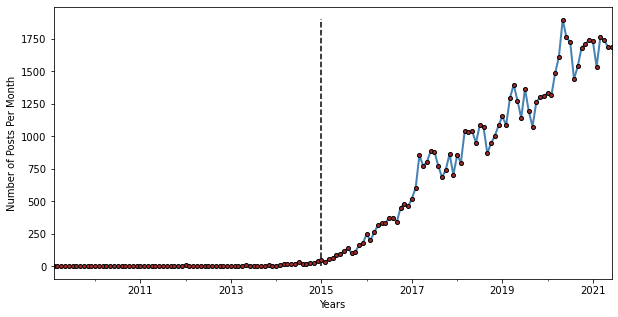

In [17]:
stagemonth.plot(linewidth = 2, 
                color = 'steelblue',
                marker = 'o', 
                markersize = 4, 
                markeredgecolor='black', 
                markerfacecolor='brown',
                figsize = (10,5))
plt.xlabel('Years')
plt.ylabel('Number of Posts Per Month')
plt.legend().remove()
plt.vlines('2015-01', 0, 1900, 'black', '--', label='')
plt.savefig("NumOfPosts_1.pdf")